# PHYS3116 Computational Assessment: Area 51 Interns

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from scipy.signal import find_peaks

## Introduction to assessment
**Option 1: Accreted Milky Way Globular Clusters**

Using data from the Harris Catalogue of Milky Way globular clusters and vandenBerg et al. (2013), use
stellar population (metallicities [Fe/H] and ages) and dynamical information to identify potentially
accreted globular clusters. Consider if there are some globular clusters that stand out in the agemetallicity relation or that do not rotate with the bulk of other globular clusters.

Consider what the above findings might mean for how the Milky Way formed and how many of its
globular clusters could be accreted and how many may have formed within the Milky Way. Consider
what further tests could be performed to delineate various possible formation scenarios.

Reformatted .csv versions of relevant data tables have been uploaded to Moodle for convenience.

## 1) Extracting data from .csv files

- Extracting stellar population (metallicities [Fe/H] and ages) information from Krause21.csv by Dan.

In [13]:
# Extract the metallicity and age of a series of globular clusters
krause = pd.read_csv('Krause21.csv')
krause['FeH'] = pd.to_numeric(krause['FeH'], errors='coerce')
krause['Age'] = pd.to_numeric(krause['Age'], errors='coerce')

- Extracting stellar population (metallicities [Fe/H] and ages) dynamical information from HarrisPartI.csv and HarrisPartIII.csv by Trong.

In [3]:
# Import data from HarrisPartI.csv and HarrisPartIII.csv
harris_p1 = pd.read_csv('HarrisPartI.csv')
harris_p3 = pd.read_csv('HarrisPartIII.csv')

# Extract dynamical information from HarrisPartIII.csv
# Except "ID" and "mu_V" which is surface brightness (photometric, not directly dynamical)
for col_name in harris_p3.columns:
    if col_name not in ["ID", "mu_V"]:
        harris_p3[col_name] = pd.to_numeric(harris_p3[col_name], errors='coerce')


- Extracting stellar population (metallicities [Fe/H] and ages) from vandenBerg_table2.csv by Frank.

In [15]:
# Import data from HarrisPartI.csv and HarrisPartIII.csv
vandenberg = pd.read_csv('vandenBerg_table2.csv')
vandenberg['FeH'] = pd.to_numeric(vandenberg['FeH'], errors='coerce')
vandenberg['Age'] = pd.to_numeric(vandenberg['Age'], errors='coerce')


## 2) Plotting

- Plotting Sky Distribution of Globular Clusters (Colored by Distance) from HarrisPartI.csv by Trong.

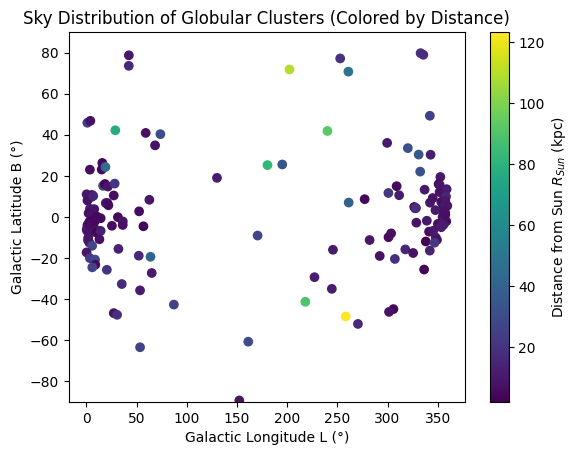

In [16]:
# Plotting Sky Distribution of Globular Clusters (Colored by Distance)
plt.scatter(
    harris_p1["L"],
    harris_p1["B"],
    c=harris_p1["R_Sun"]  
)

# Change y-limit to be between -90 and 90
plt.ylim(-90, 90)
plt.xlabel("Galactic Longitude L (°)")
plt.ylabel("Galactic Latitude B (°)")
plt.title("Sky Distribution of Globular Clusters (Colored by Distance)")

# color by distance from Sun
cbar = plt.colorbar()
cbar.set_label("Distance from Sun $R_{Sun}$ (kpc)")

plt.show()

- Plotting Agemetallicity Relation of Star Clusters from Krause21.csv by Trong.

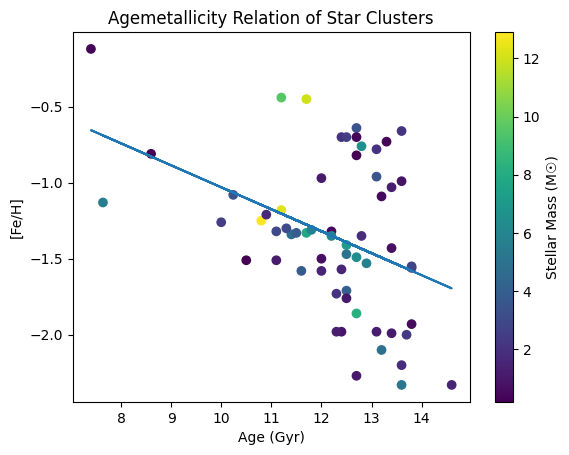

In [ ]:
plt.scatter(
    krause["Age"], 
    krause["FeH"],
    c=krause["Mstar"],
    label="Data"
)

plt.xlabel("Age (Gyr)")
plt.ylabel("[Fe/H]")
plt.title("Agemetallicity Relation of Star Clusters")

cbar = plt.colorbar()
cbar.set_label("Stellar Mass (M☉)")


# Fit a linear curve
result = stats.linregress(krause["Age"], krause["FeH"])

# Adding LOB to graph
plt.plot(
    krause["Age"], result.slope * krause["Age"] + result.intercept,
    label=f'y = {result.slope:.2f} * x + {result.slope:.2f}'
)

plt.show()

- Plotting Agemetallicity Relation of Star Clusters from vanderBerg_table2.csv by Trong.

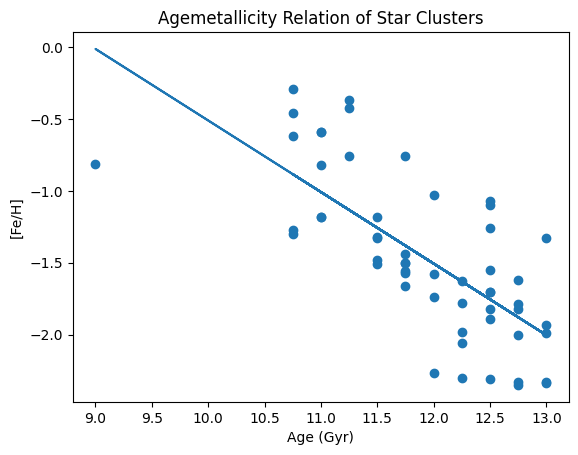

In [16]:
plt.scatter(
    vandenberg["Age"], 
    vandenberg["FeH"],
    label="Data"
)

plt.xlabel("Age (Gyr)")
plt.ylabel("[Fe/H]")
plt.title("Agemetallicity Relation of Star Clusters")


# Fit a linear curve
result1 = stats.linregress(vandenberg["Age"], vandenberg["FeH"])

# Adding LOB to graph
plt.plot(
    vandenberg["Age"], result1.slope * vandenberg["Age"] + result1.intercept,
    label=f'y = {result1.slope:.2f} * x + {result1.slope:.2f}'
)

plt.show()